In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [2]:
#import our data
df = pd.read_csv(r'C:\Users\omid7\OneDrive\Desktop\Alex first project\movies.csv')
#take a look at data
df.head(10)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [3]:
#drop if there is any dublicate data

df.drop_duplicates()

# Order our Data a little bit to see

df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [4]:
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [5]:
'''
budget column has the most missing values.
Let's see what category has the most correlation with budget so we may use that for imputing 
missing values in budget column.
'''
# Correlation Matrix between all numeric columns

df.corr(method ='pearson')


,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


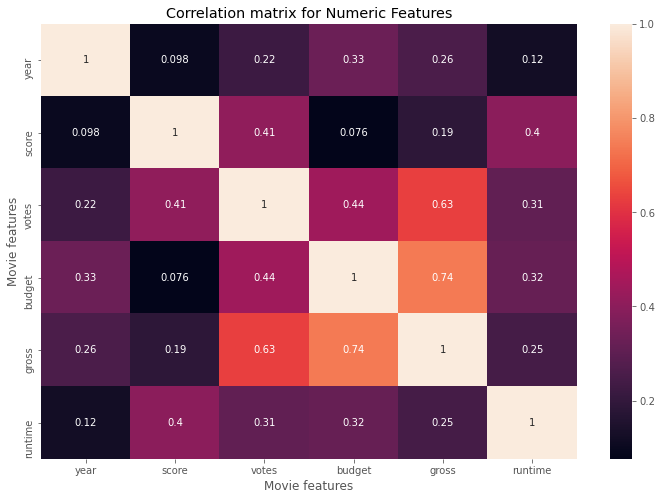

In [6]:
# we can also map it
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [7]:
# We can see that budget has the highest correlation with gross.
# Let's use regression to estimata our missing budgets values
df2 = df.dropna(subset=['gross' , 'budget'])
from scipy import stats      
slope_b, intercept_b, r_value_b, pv_b, se_b = stats.linregress(df2.gross,df2.budget)
print('intercept:', intercept_b)
print('slope:', slope_b)

intercept: 19003808.109476425
slope: 0.16440870445681136


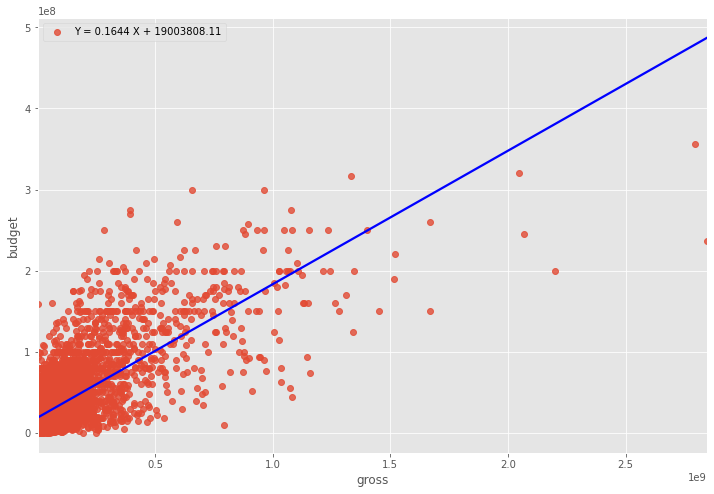

In [8]:
# We can also map our regression line       
sns.regplot(x= df2.gross, y=df2.budget,  
    ci=None,line_kws={'color' : 'blue'}, label="Y = {0:.4f} X + {1:.2f}".format(slope_b, intercept_b)).legend(loc="best")

In [9]:
# We can do the same method to estimate our missing gross values based on the movie budget
from scipy import stats      
slope_g, intercept_g, r_value_g, pv_g, se_g = stats.linregress(df2.budget,df2.gross)
print('intercept:', intercept_g)
print('slope:', slope_g)

intercept: -16825009.95297028
slope: 3.3342796500711454


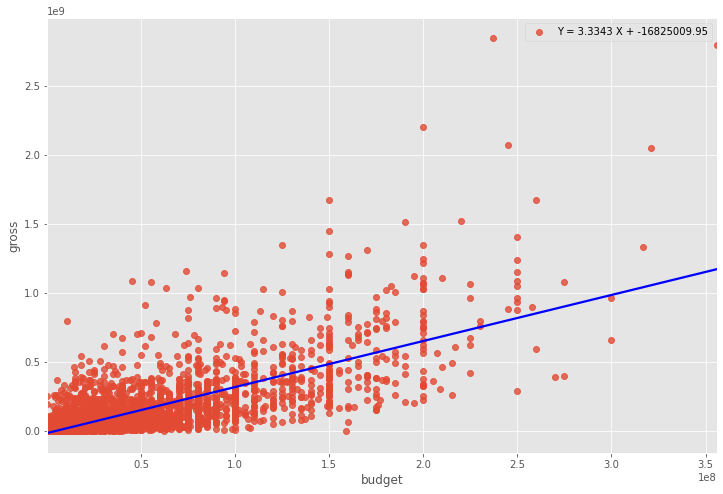

In [10]:
# Let's map our regression line       
sns.regplot(x= df2.budget, y=df2.gross,  
    ci=None,line_kws={'color' : 'blue'}, label="Y = {0:.4f} X + {1:.2f}".format(slope_g, intercept_g)).legend(loc="best")

In [11]:
'''Before we can impute our budget missing values 
we should find rows with budget missing values excluding those gross values are also missed
'''

idx, idy = np.where(pd.isnull(df))
result = np.column_stack([df.index[idx], df.columns[idy]])
budget_missing_index = []
gross_missing_index = []
mutual_missing_index = []
for i in result:
    if i[1] == 'budget':
        budget_missing_index.append(i[0])
    if i[1] == 'gross':
        gross_missing_index.append(i[0])

for i in budget_missing_index:
    if i in  gross_missing_index:
        mutual_missing_index.append(i)
  

for i in mutual_missing_index:
    budget_missing_index.remove(i)
    gross_missing_index.remove(i)
                   
for i in budget_missing_index:
    if i in   gross_missing_index:
        print(i)    
        
print(len(mutual_missing_index))

        
        

128


In [12]:
# Now we can impute our budget missing values !
for i in budget_missing_index:
    df.loc[i, 'budget'] = (df.loc[i,'gross'] * slope_b) + intercept_b
    #print( df.loc[i, 'budget'] ) 

In [13]:
#imputing gross missing values
for j in gross_missing_index:
    df.loc[j,'gross'] = (df.loc[j,'budget'] * slope_g) + intercept_g
    #print( df.loc[j, 'gross'] ) 


In [14]:

#impute left missing values in budget and gross column with the mean 

for i in mutual_missing_index:
    df.loc[i , 'budget'] = df.budget.mean()
    df.loc[i , 'gross'] = df.gross.mean()
    
print(df.budget.isnull().sum())
print(df.gross.isnull().sum())




0
0


In [15]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 56569272804
Universal Pictures           52592039888
Columbia Pictures            43008941346
Paramount Pictures           40571458413
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9307927492
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

In [16]:
# Let's see which are the highest gross revenues companies  made in a year
CompanyGrossSum = df.dropna().groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company                year
Walt Disney Pictures   2019    5773131804
Marvel Studios         2018    4018631866
Universal Pictures     2015    3834354888
Twentieth Century Fox  2009    3793491246
Walt Disney Pictures   2017    3789382071
Paramount Pictures     2011    3565705182
Warner Bros.           2010    3300479986
                       2011    3223799224
Walt Disney Pictures   2010    3104474158
Paramount Pictures     2014    3071298586
Columbia Pictures      2006    2934631933
                       2019    2932757449
Marvel Studios         2019    2797501328
Warner Bros.           2018    2774168962
Columbia Pictures      2011    2738363306
Name: gross, dtype: int64

<AxesSubplot:xlabel='rating', ylabel='gross'>

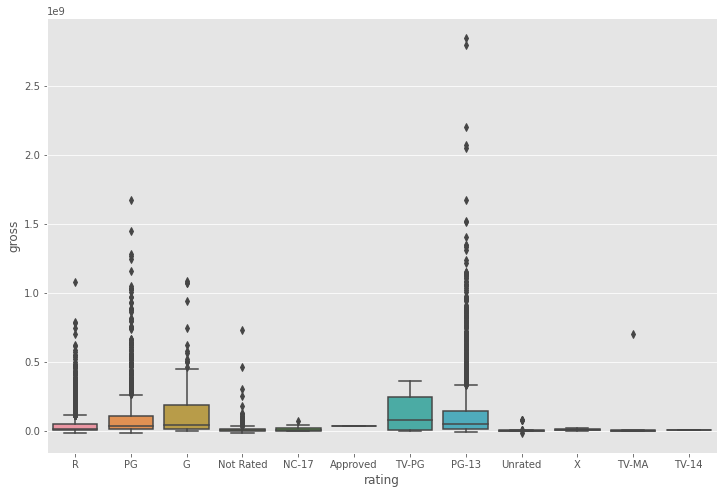

In [23]:
# Let's plot the gross based on the ratings 
sns.boxplot(x="rating", y="gross", data=df)